In [1]:
import ROOT as rt

Welcome to JupyROOT 6.28/04


In [3]:
ANF_file_name = "/eos/user/z/zewang/HZGamma_data/run2UL_data_Normalizing/ZGToLLG_two_jet_NAF.root"
data_file_name = "/eos/user/z/zewang/HZGamma_data/run2UL_data_Normalizing/data_two_jet.root"
#tree_name = "zero_to_one_jet"
tree_name = "two_jet"
bdt_boundaries = [[0., 0.59], [0.59, 0.81], [0.81, 0.91], [0.91, 1.]]
n_cat = len(bdt_boundaries)

ANF_file = rt.TFile.Open(ANF_file_name)
ANF_tree = ANF_file.Get(tree_name)

H_mass_ANF = rt.RooRealVar("CMS_hzg_mass", "CMS_hzg_mass", 125., 100., 180.)
BDT_score_ANF = rt.RooRealVar("BDT_score", "BDT_score", 0., 1.)

data_ANF = {}
data_ANF["ZG_NAF_allcat"] = rt.RooDataSet("ZG_NAF_allcat","ZG_NAF_allcat",rt.RooArgSet(H_mass_ANF))
for icat in range(n_cat):
    data_ANF["ZG_NAF_cat{}".format(icat)] = rt.RooDataSet("ZG_NAF_cat{}".format(icat),"ZG_NAF_cat{}".format(icat),rt.RooArgSet(H_mass_ANF))

for jentry in range(ANF_tree.GetEntriesFast()):
    nb = ANF_tree.GetEntry(jentry)

    if ANF_tree.H_mass<=100. or ANF_tree.H_mass>=180.: continue
    if ANF_tree.regions != 0: continue
    if ANF_tree.Z_mass>=100. or ANF_tree.Z_mass<=80.: continue
    if (ANF_tree.Z_mass + ANF_tree.H_mass) <= 185: continue
    if ANF_tree.H_mass_transfered<=100. or ANF_tree.H_mass_transfered>=180.: continue

    H_mass_ANF.setVal(ANF_tree.H_mass_transfered)
    
    data_ANF["ZG_NAF_allcat"].add(rt.RooArgSet(H_mass_ANF))
    '''
    if ANF_tree.BDT_score_transfered > bdt_boundaries[0][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[0][1]:
        data_ANF["ZG_NAF_cat0"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[1][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[1][1]:
        data_ANF["ZG_NAF_cat1"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[2][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[2][1]:
        data_ANF["ZG_NAF_cat2"].add(rt.RooArgSet(H_mass_ANF))
    elif ANF_tree.BDT_score_transfered > bdt_boundaries[3][0] and ANF_tree.BDT_score_transfered <= bdt_boundaries[3][1]:
        data_ANF["ZG_NAF_cat3"].add(rt.RooArgSet(H_mass_ANF))
    '''
    

In [4]:
data_file = rt.TFile.Open(data_file_name)
data_tree = data_file.Get(tree_name)

H_mass_ANF = rt.RooRealVar("CMS_hzg_mass", "CMS_hzg_mass", 125., 100., 180.)
BDT_score = rt.RooRealVar("BDT_score", "BDT_score", 0., 1.)

data = {}
data["data_allcat"] = rt.RooDataSet("data_allcat","data_allcat",rt.RooArgSet(H_mass_ANF))
for icat in range(n_cat):
    data["data_cat{}".format(icat)] = rt.RooDataSet("data_cat{}".format(icat),"data_cat{}".format(icat),rt.RooArgSet(H_mass_ANF))

for jentry in range(data_tree.GetEntriesFast()):
    nb = data_tree.GetEntry(jentry)

    if data_tree.H_mass<=100. or data_tree.H_mass>=180.: continue
    if data_tree.regions != 0: continue
    if data_tree.Z_mass>=100. or data_tree.Z_mass<=80.: continue
    if (data_tree.Z_mass + data_tree.H_mass) <= 185: continue

    H_mass_ANF.setVal(data_tree.H_mass)
    
    data["data_allcat"].add(rt.RooArgSet(H_mass_ANF))
    '''
    if data_tree.BDT_score > bdt_boundaries[0][0] and data_tree.BDT_score <= bdt_boundaries[0][1]:
        data["data_cat0"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[1][0] and data_tree.BDT_score <= bdt_boundaries[1][1]:
        data["data_cat1"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[2][0] and data_tree.BDT_score <= bdt_boundaries[2][1]:
        data["data_cat2"].add(rt.RooArgSet(H_mass_ANF))
    elif data_tree.BDT_score > bdt_boundaries[3][0] and data_tree.BDT_score <= bdt_boundaries[3][1]:
        data["data_cat3"].add(rt.RooArgSet(H_mass_ANF))
    '''

In [5]:
w = rt.RooWorkspace("w", "workspace")
for cat in ["data_allcat"]:
    getattr(w,'import')(data[cat])
for cat in ["ZG_NAF_allcat"]:
    getattr(w,'import')(data_ANF[cat])
w.Print()
w.writeToFile("dataTest_2jet.root")

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data_allcat
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::CMS_hzg_mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset ZG_NAF_allcat

RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

datasets
--------
RooDataSet::data_allcat(CMS_hzg_mass)
RooDataSet::ZG_NAF_allcat(CMS_hzg_mass)



In [27]:
f = rt.TFile("dataTest.root")
w = f.Get("w")
w.Print()
cat = "cat0"
dataset = w.data("{}".format(cat))
x = w.var("CMS_hzg_mass")
dataset.Print()


RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

datasets
--------
RooDataSet::cat0(CMS_hzg_mass)
RooDataSet::cat1(CMS_hzg_mass)
RooDataSet::cat2(CMS_hzg_mass)
RooDataSet::cat3(CMS_hzg_mass)

RooDataSet::cat0[CMS_hzg_mass] = 98092 entries


In [6]:
keysPdfs = {}
keysPdfs_plots = {}
def smoothbkg(name="", x=None, mc=None, Data=None, setting=rt.RooKeysPdf.MirrorBoth, rho = 1.0):
    keysPdf = rt.RooKeysPdf("CoreShape_{}".format(name), "CoreShape_{}".format(name), x, mc, setting, rho)

    canv = rt.TCanvas(name, name,800,1000)
    pad1 = rt.TPad(name+"pad1", name+"pad1", 0, 0.5, 1, 1)
    pad1.Draw()
    pad2 = rt.TPad(name+"pad2", name+"pad2", 0, 0, 1, 0.5)
    pad2.Draw()
    pad1.cd()
    pad1.SetLeftMargin(0.13)
    
    frame = x.frame(rt.RooFit.Title("Kernel Density Estimation with RooKeysPdf"))
    legend1 = rt.TLegend(0.7, 0.7, 0.9, 0.9)

    # Draw the smooth pdf and data
    x.setRange("unblindReg_1",100,120)
    x.setRange("unblindReg_2",130,180)

    Data.plotOn(frame, rt.RooFit.CutRange("unblindReg_1"))
    Data.plotOn(frame, rt.RooFit.CutRange("unblindReg_2"))
    keysPdf.plotOn(frame)
    frame.Draw()
    legend1.AddEntry(Data, "Data", "P")
    legend1.AddEntry(keysPdf, "Core PDF", "l")
    legend1.Draw()

    pad1.Update()
    pad1.Draw()

    pad2.cd()
    pad2.SetLeftMargin(0.13)

    frame = x.frame(rt.RooFit.Title("Kernel Density Estimation with RooKeysPdf"))
    legend2 = rt.TLegend(0.7, 0.7, 0.9, 0.9)

    mc.plotOn(frame, rt.RooFit.DrawOption("P"), rt.RooFit.MarkerColor(rt.kRed), rt.RooFit.LineColor(rt.kRed))
    keysPdf.plotOn(frame)
    frame.Draw()
    legend2.AddEntry(mc, "NAF MC", "P")
    legend2.AddEntry(keysPdf, "Core PDF", "l")
    legend2.Draw()

    pad2.Update()
    pad2.Draw()
    canv.Update()
    canv.Draw()

    return keysPdf, canv


[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 10758 events out of 29315 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 13248 events out of 29315 total events


Warning in <TCanvas::Constructor>: Deleting canvas with same name: ZG_NAF_allcat


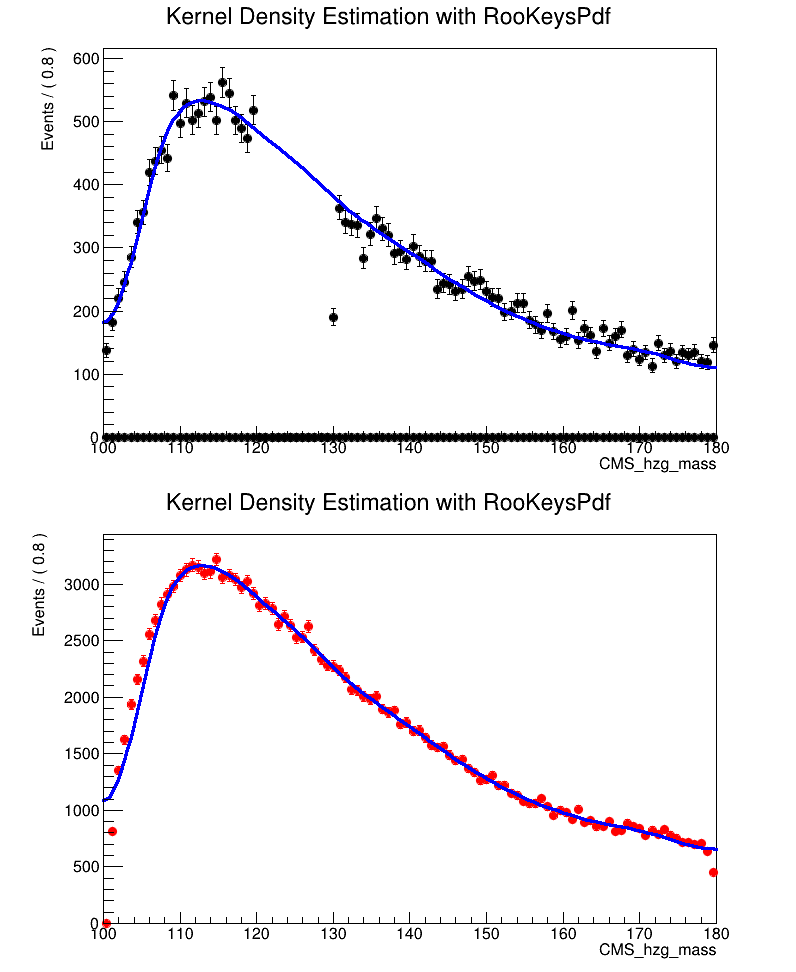

In [8]:
cat = "allcat"
keysPdfs["ZG_NAF_{}".format(cat)], keysPdfs_plots["ZG_NAF_{}".format(cat)] = smoothbkg("ZG_NAF_{}".format(cat), H_mass_ANF, data_ANF["ZG_NAF_{}".format(cat)], data["data_{}".format(cat)], rt.RooKeysPdf.MirrorBoth, 2)

In [9]:
w = rt.RooWorkspace("w", "workspace")
for cat in ["ZG_NAF_allcat"]:
    getattr(w,'import')(keysPdfs[cat])
w.Print()
w.writeToFile("ZGCoreShape_2jet.root")

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooKeysPdf::CoreShape_ZG_NAF_allcat
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::CMS_hzg_mass

RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_ZG_NAF_allcat[ x=CMS_hzg_mass ] = 0.00484338




RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_ZG_NAF_allcat[ x=CMS_hzg_mass ] = 0.00447896
RooKeysPdf::CoreShape_ZG_NAF_cat0[ x=CMS_hzg_mass ] = 0.00504831
RooKeysPdf::CoreShape_ZG_NAF_cat1[ x=CMS_hzg_mass ] = 0.00364654
RooKeysPdf::CoreShape_ZG_NAF_cat2[ x=CMS_hzg_mass ] = 0.00239393
RooKeysPdf::CoreShape_ZG_NAF_cat3[ x=CMS_hzg_mass ] = 0.00249109

0x55a108d05ca0 RooKeysPdf::CoreShape_ZG_NAF_cat0 = 0.00504831 [Auto,Dirty] 
  0x55a0f08c1d10/V- RooRealVar::CMS_hzg_mass = 134.583


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


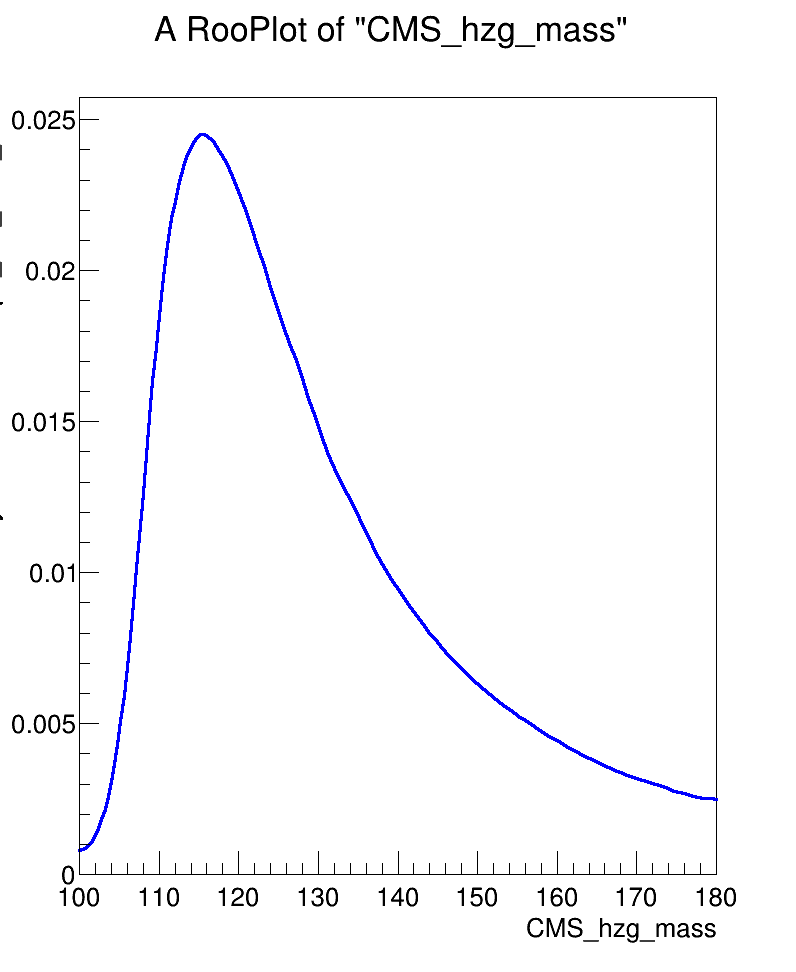

In [36]:
f = rt.TFile("ZGCoreShape.root")
w = f.Get("w")
w.Print()
model = w.pdf("CoreShape_ZG_NAF_cat0")
x = w.var("CMS_hzg_mass")
model.Print("t")
canv = rt.TCanvas("c1","c1",800,1000)
xframe = x.frame()
model.plotOn(xframe)
xframe.Draw()
canv.Draw()

# Fit Test

In [2]:
def bkg(x=None, corefunc=None, Func_type="", order=1):
    if Func_type == "exp":
        f1 = rt.RooRealVar("f1","f1",0.5,0.,1.)
        f2 = rt.RooRealVar("f2","f2",0.4,0.,1.)
        f3 = rt.RooRealVar("f3","f3",0.4,0.,1.)
        p1 = rt.RooRealVar("p1","p1",-0.01,-.1,.1)
        p2 = rt.RooRealVar("p2","p2",-0.001,-.1,.1)
        p3 = rt.RooRealVar("p3","p3",-0.005,-.1,.1)

        #pdf_exp = RooExponential("exp","exp",mass_,p1)
        exp_order1 = rt.RooFormulaVar("exp_order1", "exp_order1","@3*exp(@1*@0)",rt.RooArgList(x,p1,f1))
        exp_order2 = rt.RooFormulaVar("exp_order2", "exp_order2","@3*exp(@1*@0)+@4*exp(@2*@0)",rt.RooArgList(x,p1,p2,f1,f2))
        exp_order3 = rt.RooFormulaVar("exp_order3", "exp_order3","@4*exp(@1*@0)+@5*exp(@2*@0)+@6*exp(@3*@0)",rt.RooArgSet(x,p1,p2,p3,f1,f2,f3))

        if order == 1: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order1)
        if order == 2: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order2)
        if order == 3: 
            model_final = rt.RooEffProd("model_final", "model_final", corefunc, exp_order3)

    return model_final


In [2]:
f = rt.TFile("ZGCoreShape.root")
w = f.Get("w")
w.Print()
cat = "cat0"
core_model = w.pdf("CoreShape_ZG_NAF_{}".format(cat))
x = w.var("CMS_hzg_mass")

f = rt.TFile("dataTest.root")
w = f.Get("w")
w.Print()
dataset = w.data("data_{}".format(cat))


RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

p.d.f.s
-------
RooKeysPdf::CoreShape_ZG_NAF_allcat[ x=CMS_hzg_mass ] = 0.00447896
RooKeysPdf::CoreShape_ZG_NAF_cat0[ x=CMS_hzg_mass ] = 0.00504831
RooKeysPdf::CoreShape_ZG_NAF_cat1[ x=CMS_hzg_mass ] = 0.00364654
RooKeysPdf::CoreShape_ZG_NAF_cat2[ x=CMS_hzg_mass ] = 0.00239393
RooKeysPdf::CoreShape_ZG_NAF_cat3[ x=CMS_hzg_mass ] = 0.00249109


RooWorkspace(w) workspace contents

variables
---------
(CMS_hzg_mass)

datasets
--------
RooDataSet::data_cat0(CMS_hzg_mass)
RooDataSet::data_cat1(CMS_hzg_mass)
RooDataSet::data_cat2(CMS_hzg_mass)
RooDataSet::data_cat3(CMS_hzg_mass)
RooDataSet::data_allcat(CMS_hzg_mass)
RooDataSet::ZG_NAF_cat0(CMS_hzg_mass)
RooDataSet::ZG_NAF_cat1(CMS_hzg_mass)
RooDataSet::ZG_NAF_cat2(CMS_hzg_mass)
RooDataSet::ZG_NAF_cat3(CMS_hzg_mass)
RooDataSet::ZG_NAF_allcat(CMS_hzg_mass)



In [3]:
f1 = rt.RooRealVar("f1","f1",0.5,0.,1.)
f2 = rt.RooRealVar("f2","f2",0.4,0.,1.)
f3 = rt.RooRealVar("f3","f3",0.4,0.,1.)
p1 = rt.RooRealVar("p1","p1",-0.1,-.1,.1)
p2 = rt.RooRealVar("p2","p2",-0.01,-.1,.1)
p3 = rt.RooRealVar("p3","p3",-0.005,-.1,.1)

#pdf_exp = RooExponential("exp","exp",mass_,p1)
exp_order1 = rt.RooGenericPdf("exp_order1", "exp_order1","@2*exp(@1*@0)",rt.RooArgList(x,p1,f1))
exp_order2 = rt.RooFormulaVar("exp_order2", "exp_order2","@3*exp(@1*@0)+@4*exp(@2*@0)",rt.RooArgList(x,p1,p2,f1,f2))
exp_order3 = rt.RooFormulaVar("exp_order3", "exp_order3","@4*exp(@1*@0)+@5*exp(@2*@0)+@6*exp(@3*@0)",rt.RooArgSet(x,p1,p2,p3,f1,f2,f3))

#model_final = rt.RooEffProd("model_final", "model_final", core_model, exp_order1)

In [4]:
model_final = rt.RooEffProd("model_final", "model_final", core_model, exp_order1)

In [4]:
model = bkg(x, core_model, "exp", 1)


: 

In [ ]:
model.fitTo(data["data_"+cat])

: 

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_final_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(exp_order1_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (CoreShape_ZG_NAF_cat0)
 **********
 **   11 **SET PRINT           1
 **********
 **********
 **   12 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           2.60287e-01  2.39713e-01    0.00000e+00  1.00000e+00
     2 p1           5.98934e-03  1.69103e-04   -1.00000e-01  1.00000e-01
 **********
 **   13 **SET ERR         0.5
 **********
 **********
 **   14 **SET PRINT           1
 **********
 ***

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


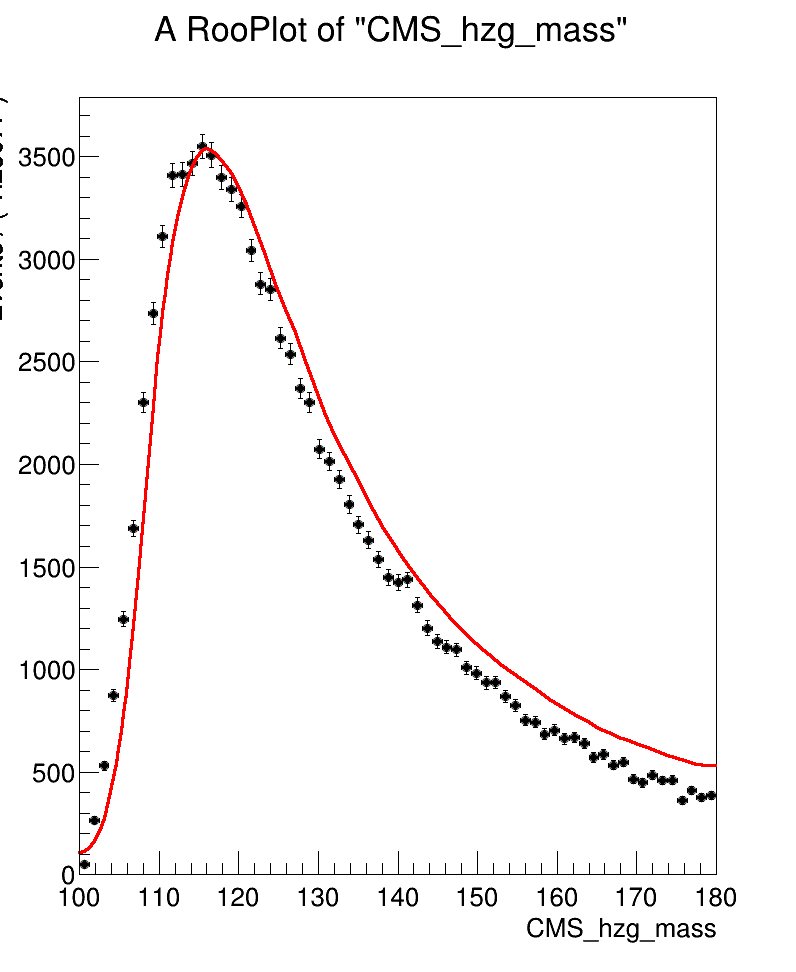

In [7]:
results = model_final.fitTo(dataset)

canv = rt.TCanvas("c1","c1",800,1000)
frame = x.frame(65)

dataset.plotOn(frame)
model_final.plotOn(frame,rt.RooFit.LineColor(rt.kRed))

frame.Draw()
canv.Draw()

#print(results)
#results.Print("v")

In [24]:
results = model_final.fitTo(data[cat])

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_final_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(exp_order1_Int[CMS_hzg_mass]) using numeric integrator RooIntegrator1D to calculate Int(CMS_hzg_mass)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (CoreShape_cat0)
 **********
 **   40 **SET PRINT           1
 **********
 **********
 **   41 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           2.60287e-01  2.39713e-01    0.00000e+00  1.00000e+00
     2 p1           1.33922e-03  1.81223e-04   -1.00000e-01  1.00000e-01
 **********
 **   42 **SET ERR         0.5
 **********
 **********
 **   43 **SET PRINT           1
 **********
 **********

<cppyy.gbl.RooFitResult object at 0x(nil)>

In [10]:
filename = "/afs/cern.ch/work/z/zewang/private/HZGamma/flashggfinalfit/CMSSW_10_2_13/src/flashggFinalFit/InputData/jet01_run2_CoreFunc_v2/HZGamma_data_sig_Hm125_workspace_cat0.root"

file = rt.TFile(filename)
dataset = file.CMS_hzg_workspace.data("ggh_125_13TeV_untag_cat0")
CMS_hzg_mass = rt.RooRealVar("CMS_hzg_mass", "CMS_hzg_mass", 125., 110., 140.)


In [9]:
dataset.Print()


RooDataSet::ggh_125_13TeV_untag_cat0[CMS_hzg_mass,weight:CMS_hzg_weight] = 65433 entries (50.0164 weighted)


In [32]:
import numpy as np
from ROOT import RooAbsPdf

class DoubleSidedCrystalballFunction(RooAbsPdf):
    def __init__(self, name, title, x, a1, a2, n1, n2, mean, sigma):
        #super(MyCustomPdf, self).__init__(name, title)
        self.x = RooRealVar(x.GetName(), x.GetTitle(), x.getMin(), x.getMax())
        self.a1 = RooRealVar(a1.GetName(), a1.GetTitle(), a1.getMin(), a1.getMax())
        self.a2 = RooRealVar(a2.GetName(), a2.GetTitle(), a2.getMin(), a2.getMax())
        self.n1 = RooRealVar(n1.GetName(), n1.GetTitle(), n1.getMin(), n1.getMax())
        self.n2 = RooRealVar(n2.GetName(), n2.GetTitle(), n2.getMin(), n2.getMax())
        self.mean = RooRealVar(mean.GetName(), mean.GetTitle(), mean.getMin(), mean.getMax())
        self.sigma = RooRealVar(sigma.GetName(), sigma.GetTitle(), sigma.getMin(), sigma.getMax())
        self._vars = ROOT.RooArgSet(self.x, self.a1, self.a2, self.n1, self.n2, self.mean, self.sigma)
        
    def evaluate(self):
        x_val = self.x.getVal()
        a1_val = self.a1.getVal()
        a2_val = self.a2.getVal()
        n1_val = self.n1.getVal()
        n2_val = self.n2.getVal()
        mean_val = self.mean.getVal()
        sigma_val = self.sigma.getVal()
        return self.My_DoubleSidedCrystalballFunction(x_val, a1_val, a2_val, n1_val, n2_val, mean_val, sigma_val)
    
    def My_DoubleSidedCrystalballFunction( x, a1, a2, n1, n2, mean, sigma):

        t = (x-mean)/sigma
        val = -99.

        if t > -a1 and t < a2:
            val = np.exp(-0.5*t*t)
        elif t<=-a1:
            alpha1invn1 = a1/n1
            val = np.exp(-0.5*a1*a1)*pow(1. - alpha1invn1*(a1+t), -n1)
        elif t>=a2:
            alpha2invn2 = a2/n2
            val = np.exp(-0.5*a2*a2)*pow(1. - alpha2invn2*(a2-t), -n2)
        return val
    
    def getAnalyticalIntegral(self, allVars, analVars, rangeName):
        return 0

    def analyticalIntegral(self, code, rangeName):
        return 1

In [36]:
sigma_dcb = rt.RooRealVar("sigma_dcb","sigma_mh_dcb", 2., 1.0, 3.)
mean_dcb = rt.RooRealVar("mean_dcb","mean_dcb",2., 1.0, 5.)
a1_dcb = rt.RooRealVar("a1_dcb","a1_mh_dcb", 5., 0.01, 100.)
a2_dcb = rt.RooRealVar("a2_dcb","a2_mh_dcb", 5., 0.01, 100.)   
n1_dcb = rt.RooRealVar("n1_dcb","n1_mh_dcb", 2.,0.0001,10.)
n2_dcb = rt.RooRealVar("n2_dcb","n2_mh_dcb", 20.,0.0001,500)

#pdf_dcb = DoubleSidedCrystalballFunction("DSCB", "DSCB", CMS_hzg_mass, a1_dcb, a2_dcb, n1_dcb, n2_dcb, mean_dcb,sigma_dcb)

DSCB_func = rt.RooGenericPdf("DSCB_func", "((@0-@5)/@6 > -@1)*((@0-@5)/@6 < @2)*(exp(-0.5*((@0-@5)/@6)*((@0-@5)/@6))) + ((@0-@5)/@6 <= -@1)*( exp(-0.5*@1*@1)*pow(1-@1/@3*(@1+((@0-@5)/@6)), -@3) ) + ((@0-@5)/@6 >= @2)*( exp(-0.5*@2*@2)*pow(1-@2/@4*(@2-((@0-@5)/@6)), -@4) )", rt.RooArgSet(CMS_hzg_mass, a1_dcb, a2_dcb, n1_dcb, n2_dcb, mean_dcb,sigma_dcb))

In [ ]:
DSCB_func.fitTo(dataset)